In [8]:
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [9]:
gender_model = load_model('Gender_recognition.h5')
gender_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#arr = ["1", "2"]
#str1 = ''.join(arr)
#print (str1)
#print(gender_model.get_weights()[1][1])

In [10]:
age_model = load_model('Age_category_recognition.h5')
age_model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [5]:
def GenderPredict(model, image_file):
    label_names = ["Female", "Male"]
    # Метод для загрузки изображения:
    img = image.load_img(image_file, target_size=(150, 150))
    img_arr = np.expand_dims(img, axis=0) / 255.0
    result = model.predict_classes(img_arr) #метод для предсказания
    return label_names[result[0][0]]




In [6]:
def AgePredict(model, image_file):
    label_names = ["Adult", "Child", "Oldman"]
    # Метод для загрузки изображения:
    img = image.load_img(image_file, target_size=(150, 150))
    img_arr = np.expand_dims(img, axis=0) / 255.0
    result = model.predict_classes(img_arr) #метод для предсказания
    return label_names[result[0]]

In [8]:
def Predict(img_file):
    gender = GenderPredict(gender_model, img_file)
    age = AgePredict (age_model, img_file)
    img = image.load_img(img_file, target_size=(150, 150))
    plt.imshow(img)
    print(" Gender: ", gender, "\n Age category: ", age)

 Gender:  Male 
 Age category:  Child


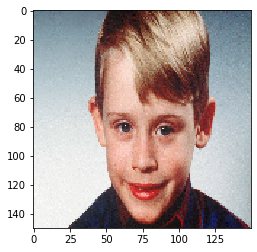

In [17]:
Predict("kevin.jpg")

In [5]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1. / 255)


In [16]:
predict_generator = datagen.flow_from_directory(
    directory="Predicts",
    target_size=(150, 150),
    color_mode="rgb",
    class_mode=None,
    shuffle=False
)

Found 165 images belonging to 1 classes.


In [11]:
import os
def Predict_childs():
    label_names = ["Adult", "Child", "Oldman"]
    result = []
    for filename in os.listdir("test_age\\Childs"):
        # Метод для загрузки изображения:
        img = image.load_img("test_age\\Childs\\" + str(filename), target_size=(150, 150))
        img_arr = np.expand_dims(img, axis=0) / 255.0
        age = age_model.predict_classes(img_arr) #метод для предсказания
        result.append(label_names[age[0]])
    return result

In [12]:
def Predict_adults():
    label_names = ["Adult", "Child", "Oldman"]
    result = []
    for filename in os.listdir("test_age\\Adults"):
        # Метод для загрузки изображения:
        img = image.load_img("test_age\\Adults\\" + str(filename), target_size=(150, 150))
        img_arr = np.expand_dims(img, axis=0) / 255.0
        age = age_model.predict_classes(img_arr) #метод для предсказания
        result.append(label_names[age[0]])
    return result

In [42]:
def Predict_oldmans():
    #label_names = ["Adult", "Child", "Oldman"]
    result = []
    for filename in os.listdir("test_age\\Oldmans"):
        # Метод для загрузки изображения:
        img = image.load_img("test_age\\Oldmans\\" + str(filename), target_size=(150, 150))
        img_arr = np.expand_dims(img, axis=0) / 255.0
        age = age_model.predict_classes(img_arr) #метод для предсказания
        #result.append(label_names[age[0]])
        result.append(age)
    if result[10] == 2:
        print("Asdasd")
        
    print (result.count(2) / len(result))
    return result

In [43]:
oldmans = Predict_oldmans()

Asdasd
0.8909090909090909


In [7]:
childs = Predict_childs()
adults = Predict_adults()
oldmans = Predict_oldmans()

NameError: name 'image' is not defined

In [60]:
oldmans.count("Child")

2